# Lesson: Data Science Libraries - ADVANCED DataFrames

<a href = "https://www.canva.com/design/DAFvqkQfIsA/QM1rBIZQX8uNBjdgg1gPEg/view?utm_content=DAFvqkQfIsA&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">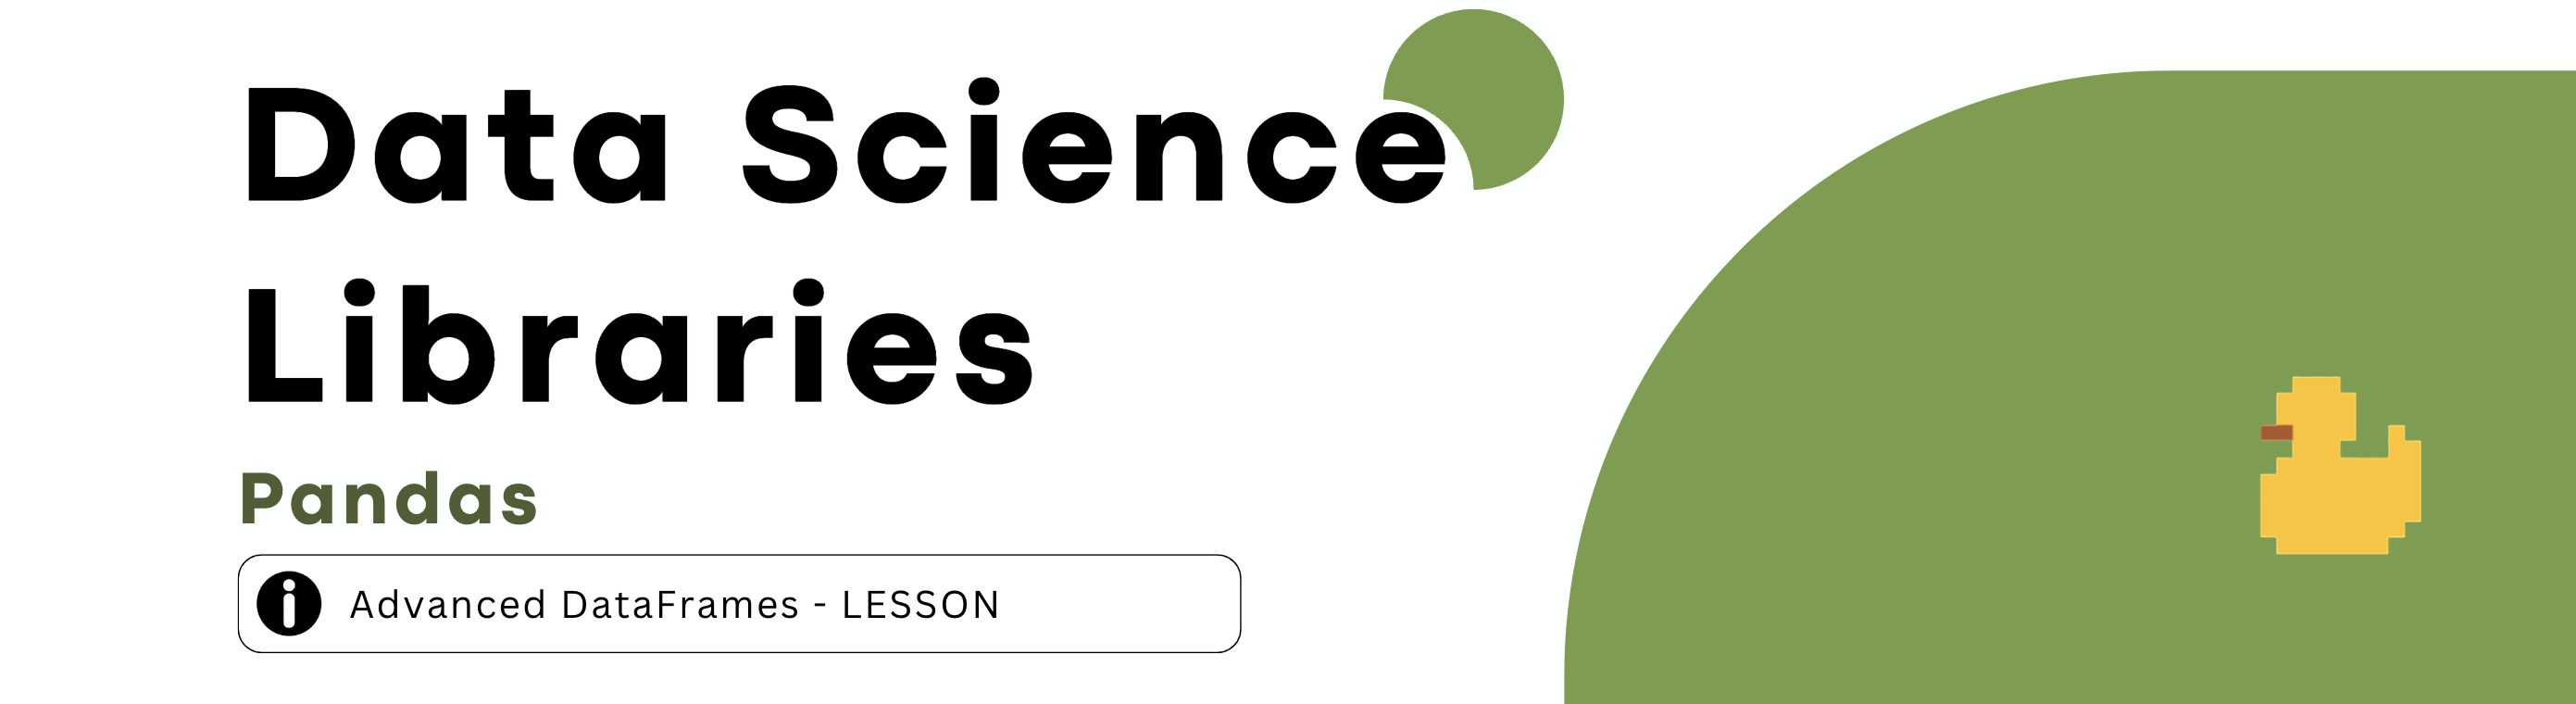</a>

<hr style="border:2px solid gray">

# Part 2 - Manipulating DataFrames
- subsetting
- indexing
- aggregrating
- combining dfs

In [1]:
#standard imports
import pandas as pd
import numpy as np

np.random.seed(123)

In [2]:
# Create list of values for names column.
students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# Randomly generate arrays of scores for each student for each subject.
# Note that all the values need to have the same length here.
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

# Randomly generate if a student is in classroom A or classroom B
classroom = np.random.choice(['A', 'B'], len(students))

df = pd.DataFrame({'name':students,
                   'math':math_grades,
                   'reading':reading_grades,
                   'english':english_grades,
                   'room':classroom})
df

,name,math,reading,english,room
0,Sally,62,80,85,A
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A
5,John,79,93,76,B
6,Thomas,82,81,64,A
7,Marie,93,90,63,A
8,Albert,92,87,62,A
9,Richard,69,94,80,A


___
## Subsetting
*(Filtering a DataFrame)*

In [3]:
# Dot Notation = Series
df.math

0     62
1     88
2     94
3     98
4     77
5     79
6     82
7     93
8     92
9     69
10    92
11    92
Name: math, dtype: int64

In [4]:
# Bracket notation will also create a Series
df['math']

0     62
1     88
2     94
3     98
4     77
5     79
6     82
7     93
8     92
9     69
10    92
11    92
Name: math, dtype: int64

In [4]:
# Unless you are passing a list as a mask! This will return a DF
df[['math']]

,math
0,62
1,88
2,94
3,98
4,77
5,79
6,82
7,93
8,92
9,69


### Subsetting using boolean masking

we love boolean masking! 

1. select SINGLE column to perform conditional statement
2. perform conditional statement (should result in series of booleans!)
3. save mask
4. apply back to DataFrame

#### Filter a subset of the DataFrame with everyone in room B
1. select room column
2. find all rooms that are B
3. mask = all rooms that are B
4. df [mask]

In [8]:
mask = df.room == 'B'
mask

0     False
1      True
2     False
3      True
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11    False
Name: room, dtype: bool

In [9]:
df[mask]

,name,math,reading,english,room
1,Jane,88,67,79,B
3,Billy,98,88,96,B
5,John,79,93,76,B
10,Isaac,92,93,99,B


#### Filter a subset of the DataFrame with everyone who is passing math

In [10]:
df[df.math > 70]

,name,math,reading,english,room
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A
5,John,79,93,76,B
6,Thomas,82,81,64,A
7,Marie,93,90,63,A
8,Albert,92,87,62,A
10,Isaac,92,93,99,B
11,Alan,92,72,62,A


### Using `np.where`

Return an array based on a condition
- format: `np.where(condition, output_if_TRUE, output_if_FALSE)`

#### Filter a subset of the DataFrame with everyone who is passing math using `np.where`
1. create array using condition
2. attach array to df as column
3. filter on new column

In [11]:
#create array based on condition
np.where(df.math > 70, 'YES','NO')

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES'], dtype='<U3')

In [12]:
#attach to df
df['passing_math'] = np.where(df.math > 70, 'YES','NO')

In [13]:
df.head()

,name,math,reading,english,room,passing_math
0,Sally,62,80,85,A,NO
1,Jane,88,67,79,B,YES
2,Suzie,94,95,74,A,YES
3,Billy,98,88,96,B,YES
4,Ada,77,98,92,A,YES


In [14]:
#filter on new column
df[df.passing_math == 'YES']

,name,math,reading,english,room,passing_math
1,Jane,88,67,79,B,YES
2,Suzie,94,95,74,A,YES
3,Billy,98,88,96,B,YES
4,Ada,77,98,92,A,YES
5,John,79,93,76,B,YES
6,Thomas,82,81,64,A,YES
7,Marie,93,90,63,A,YES
8,Albert,92,87,62,A,YES
10,Isaac,92,93,99,B,YES
11,Alan,92,72,62,A,YES


### Drop `passing_math` column

In [15]:
df = df.drop(columns='passing_math')

In [16]:
df.head()

,name,math,reading,english,room
0,Sally,62,80,85,A
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A


___
## Indexing using `.loc` and `.iloc`

Filter a subset of the DataFrame using indexing

Indexing using `.loc`

- Using the **NAME** of the index and columns, filter subset

- format: `df.loc[row_indexer_NAME, column_indexer_NAME]`

Indexing using `.iloc`

- Using the **POSITION** of the index and columns, filter subset

- format: `df.iloc[row_indexer_POSITION, column_indexer_POSITION]`

In [17]:
#set new index for demo
df = df.set_index('name')
df

,math,reading,english,room
name,,,,
Sally,62,80,85,A
Jane,88,67,79,B
Suzie,94,95,74,A
Billy,98,88,96,B
Ada,77,98,92,A
John,79,93,76,B
Thomas,82,81,64,A
Marie,93,90,63,A
Albert,92,87,62,A


### `.loc`: access subset by row and column NAME

In [18]:
df.head()

,math,reading,english,room
name,,,,
Sally,62,80,85,A
Jane,88,67,79,B
Suzie,94,95,74,A
Billy,98,88,96,B
Ada,77,98,92,A


In [19]:
#.loc[row_name,column_name]
# Index = specific row/col is called

df.loc['Sally','math']

62

In [20]:
#range = SLICING!
df.loc['Sally':'Suzie','math':'english'] #this is inclusive

,math,reading,english
name,,,
Sally,62,80,85
Jane,88,67,79
Suzie,94,95,74


In [21]:
# Slice df rows, then index for specific cols!

df.loc['Sally':'Suzie'] [['math','english']]

,math,english
name,,
Sally,62,85
Jane,88,79
Suzie,94,74


In [22]:
# Slice by rows only
df.loc['Sally':'Suzie']

,math,reading,english,room
name,,,,
Sally,62,80,85,A
Jane,88,67,79,B
Suzie,94,95,74,A


In [23]:
# Slice by columns only
# ":" is asking for all rows

df.loc[:,'math':'english']

,math,reading,english
name,,,
Sally,62,80,85
Jane,88,67,79
Suzie,94,95,74
Billy,98,88,96
Ada,77,98,92
John,79,93,76
Thomas,82,81,64
Marie,93,90,63
Albert,92,87,62


### `.iloc`: access subset by row and column POSITION

In [24]:
df.head()

,math,reading,english,room
name,,,,
Sally,62,80,85,A
Jane,88,67,79,B
Suzie,94,95,74,A
Billy,98,88,96,B
Ada,77,98,92,A


In [25]:
#range
df.iloc[0:3,0:2] #iloc is EXCLUSIVE

,math,reading
name,,
Sally,62,80
Jane,88,67
Suzie,94,95


In [26]:
#by rows only
df.iloc[2:5]

,math,reading,english,room
name,,,,
Suzie,94,95,74,A
Billy,98,88,96,B
Ada,77,98,92,A


In [27]:
#by columns only
df.iloc[:,1:3]

,reading,english
name,,
Sally,80,85
Jane,67,79
Suzie,95,74
Billy,88,96
Ada,98,92
John,93,76
Thomas,81,64
Marie,90,63
Albert,87,62


### summary of `.loc` and `.iloc`

- `.loc`: takes the NAME of the row and column index
    - this is inclusive
- `.iloc`: takes the POSITION of the row and column index
    - this is exclusive


- both format: `[row:row, column:column]`

#### setting our index back to a incremental count

In [28]:
df = df.reset_index()

In [29]:
df.loc[1:3] 

,name,math,reading,english,room
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B


In [5]:
df.loc[1:3, ['math', 'english']] 

,math,english
1,88,79
2,94,74
3,98,96


- when using `.loc` on an index that is 0,1,2, etc, it still works because the row name is just that integer value

___
## Aggregating

### `.agg` method 

- allows us specify a way to aggregate a series of numerical values

In [45]:
df.head()

,name,math,reading,english,room
0,Sally,62,80,85,A
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A


#### find the min math score

In [47]:
#what you already know
df.math.min()

62

In [49]:
min(df.math)

62

In [50]:
#using agg
df.math.agg('min')

62

#### find the min and max math score

In [51]:
df.math.min(), df.math.max()

(62, 98)

In [55]:
#contain multiple agg functions in a list

df.math.agg(['min','max','mean']).round(1)

min     62.0
max     98.0
mean    84.8
Name: math, dtype: float64

#### find the min, max, and average scores of all subjects

In [7]:
df.loc[:, 'math':'english']\
.agg(['min','max','mean'])\
.round()

,math,reading,english
min,62.0,67.0,62.0
max,98.0,98.0,99.0
mean,85.0,86.0,78.0


#### select subjects using iloc

In [69]:
df.iloc[:,1:4].agg(['min','max','mean']).round()

,math,reading,english
min,62.0,67.0,62.0
max,98.0,98.0,99.0
mean,85.0,86.0,78.0


### Transposing: make the subjects the index


In [70]:
df.iloc[:,1:4].agg(['min','max','mean']).round().T

,min,max,mean
math,62.0,98.0,85.0
reading,67.0,98.0,86.0
english,62.0,99.0,78.0


___
### `.groupby` function
- used for grouping the data according to the categories and apply a function to the categories

In [71]:
df.head()

,name,math,reading,english,room
0,Sally,62,80,85,A
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A


#### `groupby` room column

In [72]:
df.groupby('room')

> what does this output mean?

<div class="alert alert-danger" role="alert">
Similar to SQL errors!

In pandas, when you use the `.groupby()` method to group rows of a DataFrame by one or more columns, it creates a grouped object, but it doesn't return a result until you apply an aggregation function to it. There are several reasons why Python's `.groupby()` requires an aggregation:

1. <b>Grouped Data Doesn't Have a Clear Representation</b>: When you group data, the resulting groups may contain multiple rows for each group, and it's not immediately obvious what you want to do with those groups. 
    
    Should you keep all rows? Sum them? Average them? Count them? The choice of aggregation function depends on your analysis or what you want to extract from the grouped data.

2. <b>Flexibility</b>: Requiring an explicit aggregation function makes the `.groupby()` operation highly flexible. It allows you to perform a wide range of operations on the grouped data, from simple aggregations like sum or count to custom aggregation functions.

3. <b>Performance Optimization</b>: Pandas can optimize the aggregation process when it knows the specific operation you want to perform. 
    
    For example, if you want to count the number of items in each group, pandas can use an optimized counting algorithm rather than general-purpose aggregation.
    
</div>

#### find max scores by room using `groupby`

format: `df.groupby('column_name').agg_function()`

In [77]:
df.groupby('room').max()

,name,math,reading,english
room,,,,
A,Thomas,94,98,92
B,John,98,93,99


#### specify subjects only

In [76]:
df.groupby('room').max()[['math','reading','english']]

,math,reading,english
room,,,
A,94,98,92
B,98,93,99


#### can also combine with `agg` 

In [88]:
df.head()

,name,math,reading,english,room
0,Sally,62,80,85,A
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A


In [10]:
df.groupby('room')[['math','reading','english']].agg(['min','max','mean'])

math             reading             english           
      min max    mean     min max    mean     min max   mean
room                                                        
A      62  94  82.625      72  98  87.125      62  92  72.75
B      79  98  89.250      67  93  85.250      76  99  87.50

In [93]:
df[['math','reading','english','room']]\
.groupby('room').agg(['min','max','mean'])

math             reading             english           
      min max    mean     min max    mean     min max   mean
room                                                        
A      62  94  82.625      72  98  87.125      62  92  72.75
B      79  98  89.250      67  93  85.250      76  99  87.50

#### can also combine with describe

In [96]:
df.groupby('room').describe().T

room                   A          B
math    count   8.000000   4.000000
        mean   82.625000  89.250000
        std    12.281665   7.973916
        min    62.000000  79.000000
        25%    75.000000  85.750000
        50%    87.000000  90.000000
        75%    92.250000  93.500000
        max    94.000000  98.000000
reading count   8.000000   4.000000
        mean   87.125000  85.250000
        std     8.887190  12.392874
        min    72.000000  67.000000
        25%    80.750000  82.750000
        50%    88.500000  90.500000
        75%    94.250000  93.000000
        max    98.000000  93.000000
english count   8.000000   4.000000
        mean   72.750000  87.500000
        std    11.817058  11.676187
        min    62.000000  76.000000
        25%    62.750000  78.250000
        50%    69.000000  87.500000
        75%    81.250000  96.750000
        max    92.000000  99.000000

___
## Combining DataFrames

How we combine DataFrames together

### `pd.concat`

- adds two DataFrames
- adds them along either axis
    - row-wise (axis=0) aka on top of each other 
    - column-wise (axis=1) aka next to each other
- intial DataFrames are completely intact afterwards
    
 
format: `pd.concat([df1,df2], axis=#)`

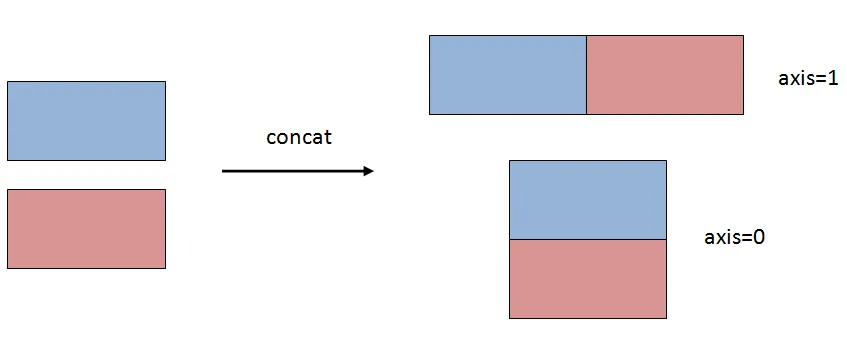

In [26]:
df1 = pd.DataFrame(
    {"city": ["Chicago", "San Francisco", "New York City", "San Antonio"], "rank": range(1, 5)})
df1

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
3,San Antonio,4


In [29]:
df2 = pd.DataFrame(
    {"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 5, 6]})
df2

,city,rank
0,Chicago,1
1,Boston,5
2,Los Angeles,6


In [11]:
df1 = pd.DataFrame({'col1': [1, 6, 3], 'col2': [6, 9, 20]})
df1

,col1,col2
0,1,6
1,6,9
2,3,20


In [12]:
df2 = pd.DataFrame({'col1': [89, 76, 24], 'col3': [110111, 11101, 10900]})
df2

,col1,col3
0,89,110111
1,76,11101
2,24,10900


#### `concat` two dfs row-wise (keep all the rows)
This performs a SQL `UNION ALL`

In [30]:
# pd.concat([df1,df2], axis=0): default = 0
pd.concat([df1,df2], axis=0)

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
3,San Antonio,4
0,Chicago,1
1,Boston,5
2,Los Angeles,6


> what do you notice about the index?

#### reset the index

In [31]:
pd.concat([df1,df2], axis=0, ignore_index=True)
# .reset_index(drop=True)

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
3,San Antonio,4
4,Chicago,1
5,Boston,5
6,Los Angeles,6


- generally want to reset the index to ensure it has all unique values

#### SQL `UNION` will remove duplicate rows, let's recreate that in pandas:

In [32]:
pd.concat([df1, df2]).drop_duplicates()

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
3,San Antonio,4
1,Boston,5
2,Los Angeles,6


In [33]:
pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True) #drop the prev index

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
3,San Antonio,4
4,Boston,5
5,Los Angeles,6


#### concat two dfs column-wise (keep all the columns)

In [34]:
# pd.concat([df1,df2], axis=1)
# default join = 'outer'
df_test = pd.concat([df1, df2], axis=1)
df_test

,city,rank,city,rank
0,Chicago,1,Chicago,1.0
1,San Francisco,2,Boston,5.0
2,New York City,3,Los Angeles,6.0
3,San Antonio,4,NaN,NaN


In [35]:
#always joins on the INDEX
pd.concat([df1, df2], axis=1, join='inner')

,city,rank,city,rank
0,Chicago,1,Chicago,1
1,San Francisco,2,Boston,5
2,New York City,3,Los Angeles,6


### `pd.merge`

- combines two DataFrames like a SQL join    
 
format: `pd.merge(df_1, df_2, how='join_type', on='column_name')`

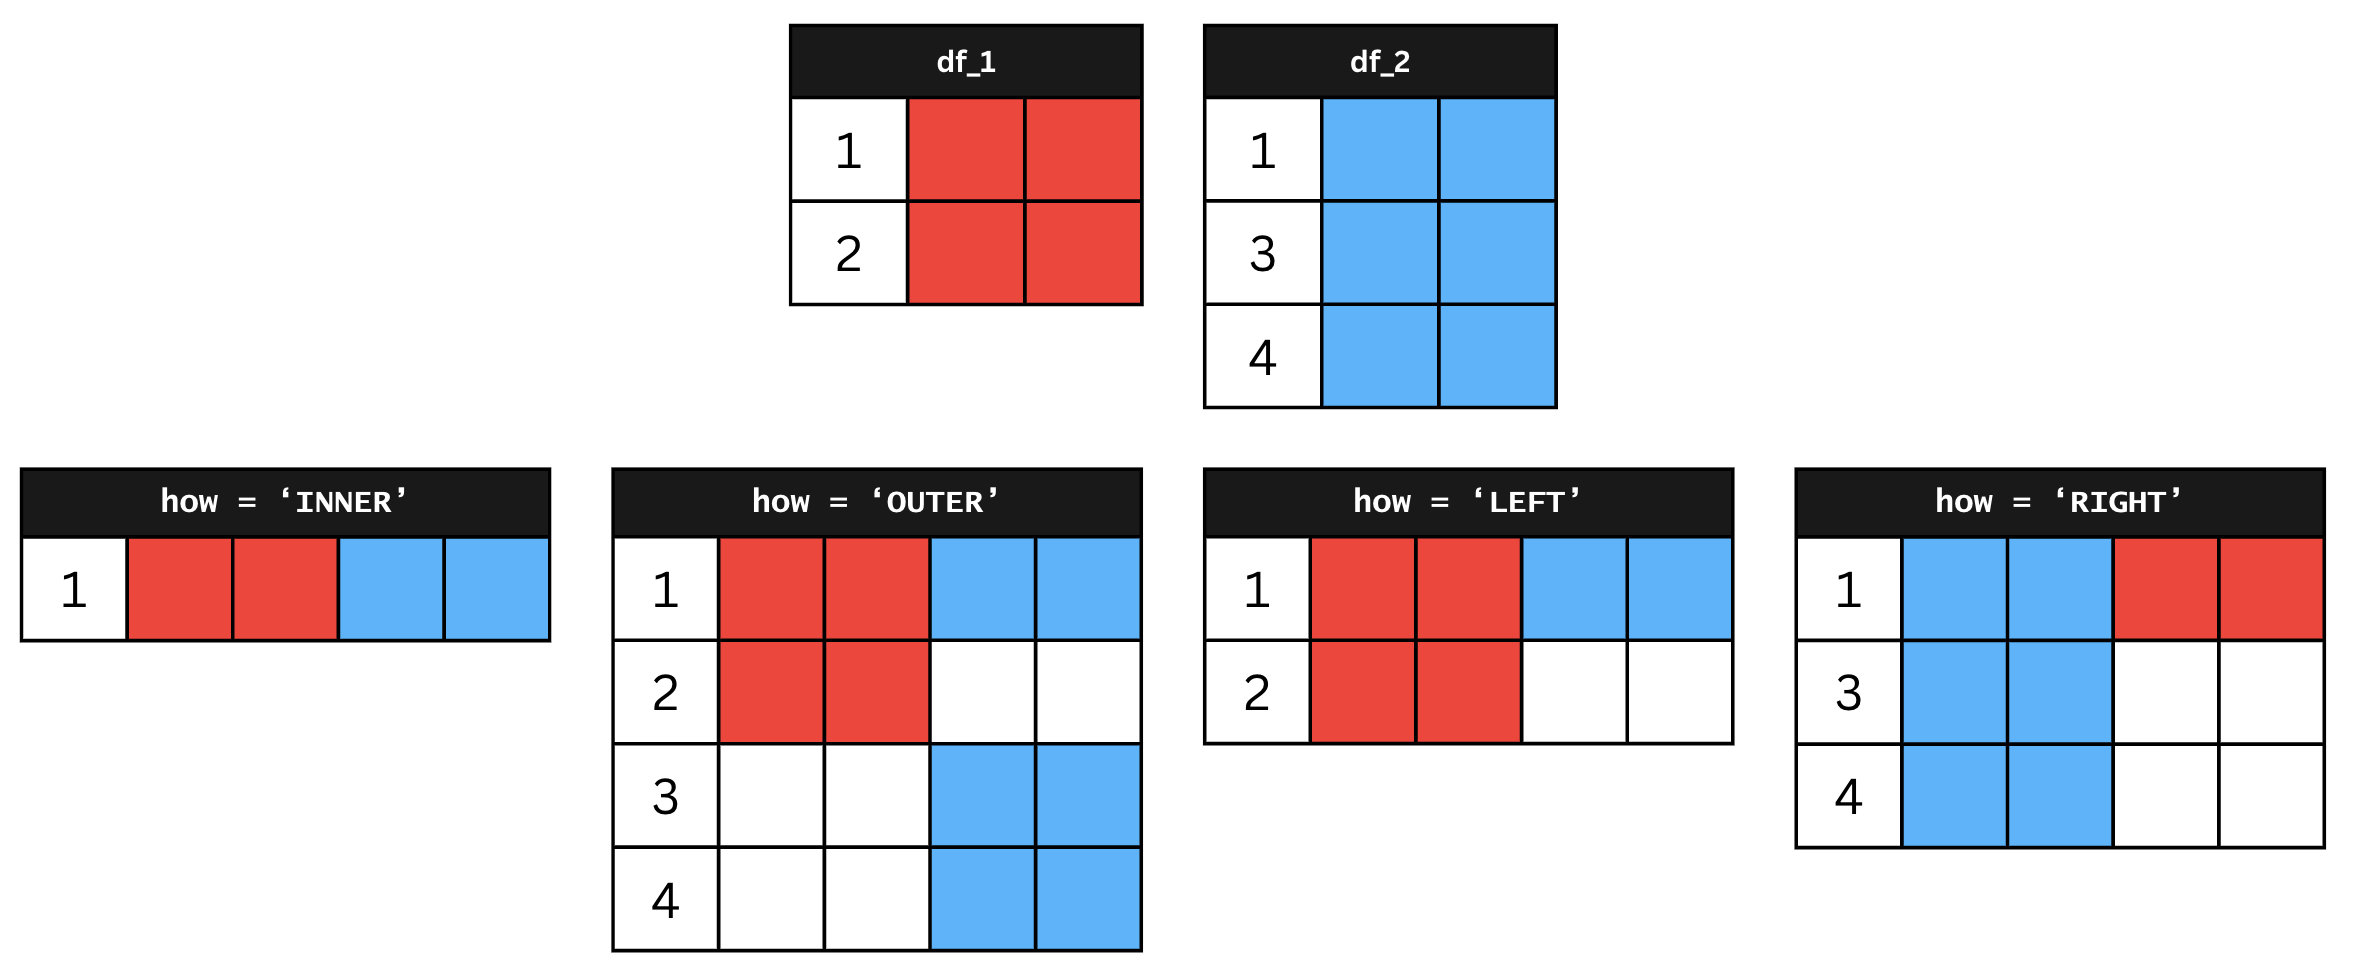

In [130]:
# Create the users DataFrame
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [131]:
# Create the roles DataFrame
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


#### merge dfs on the role id
`pd.merge(df_1, df_2, how='join_type', on='column_name')`

In [135]:
# Remember their joining on a key that does NOT have
# the same column_name!
pd.merge(users,roles, how='outer', left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [136]:
#indicator argument shows where the data is coming from in merge

pd.merge(users,roles, how='outer', 
         left_on='role_id', right_on='id',
        indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


> **note:** use `pd.merge()` instead of `pd.join()`, because `pd.merge()` has more capabilities

___
## Part 3 - Reshaping DataFrames
- crosstab
- pivot table
- map


### Using `.crosstab`
COUNT the number of occurances between each subgroup
- format: `pd.crosstab(index=_, column=_)`

In [ ]:
#calculated overall grade and letter
df['overall_grade'] = df[['math','reading','english']].mean(axis=1).round(1)

#np.where(condition, output if true, output if false)
df['overall_letter'] = np.where(df.overall_grade >= 90, 'A', 
                                np.where(df.overall_grade >= 80, 'B','C'))

df

In [3]:
df.head()

,name,math,reading,english,room,overall_grade,overall_letter
0,Sally,62,80,85,A1,75.7,C
1,Jane,88,67,79,B1,78.0,C
2,Suzie,94,95,74,A1,87.7,B
3,Billy,98,88,96,B1,94.0,A
4,Ada,77,98,92,A1,89.0,B


#### find all counts of the room and overall letter grade

In [7]:
pd.crosstab(df.room, df.overall_letter)

overall_letter,A,B,C
room,,,
A1,0,5,3
B1,2,1,1


In [8]:
pd.crosstab(df.overall_letter, df.room)

room,A1,B1
overall_letter,,
A,0,2
B,5,1
C,3,1


#### add total counts

In [9]:
#margins argument
pd.crosstab(df.room, df.overall_letter, margins=True)

overall_letter,A,B,C,All
room,,,,
A1,0,5,3,8
B1,2,1,1,4
All,2,6,4,12


#### give percentages instead of counts

In [13]:
# True: will normalize over all values (12)
pd.crosstab(df.room, df.overall_letter, normalize=True).round(2)

overall_letter,A,B,C
room,,,
A1,0.00,0.42,0.25
B1,0.17,0.08,0.08


In [14]:
# index: will normalize over each row
pd.crosstab(df.room, df.overall_letter, normalize='index').round(2)

overall_letter,A,B,C
room,,,
A1,0.0,0.62,0.38
B1,0.5,0.25,0.25


In [15]:
pd.crosstab(df.room, df.overall_letter, normalize='columns').round(2)

overall_letter,A,B,C
room,,,
A1,0.0,0.83,0.75
B1,1.0,0.17,0.25


### Using `.pivot_table`

creates a summary table similar to excel pivot table 

need to include 3 of the following:
- which values will make up the rows (the index)
- which values will make up the columns
- the values we are aggregating
- an aggregation method (aggfunc); if we can omit this, and the average will be used by default

format: `pd.pivot_table(data=_, index=_, columns=_, values=_, aggfunc=_)`

#### show the average math grade by overall letter grade and room

In [20]:
pd.pivot_table(data=df, index='room', columns='overall_letter',
              values='math')

overall_letter,A,B,C
room,,,
A1,NaN,85.0,78.666667
B1,95.0,79.0,88.000000


#### show the MAX math grade by overall letter grade and room

In [23]:
pd.pivot_table(data=df, index='room', columns='overall_letter',
              values='math', aggfunc='max')

overall_letter,A,B,C
room,,,
A1,NaN,94.0,92.0
B1,98.0,79.0,88.0


> NOTE: `index` and `columns` should be categorical values, and `values` should be numeric

### Using `.map`

Use a dictionary to assign new values based on current values
1. create a dictionary of new values based on old
2. use map to apply it to df

- format: `.map({'old_value':'new_value'})`

#### create new df of restuarant data

In [24]:
n = 40

df = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n),
})

df.sample(10)

,drink,meal
0,Tea,Pad Thai
38,Water,Curry
11,Tea,Curry
4,Tea,Curry
16,Water,Curry
2,Tea,Yakisoba Noodle
22,Water,Yakisoba Noodle
5,Water,Pad Thai
19,Tea,Pad Thai
15,Water,Yakisoba Noodle


#### create dictionary of prices for all current items

In [25]:
#dictionary format: {key:value}
prices = {
    'Yakisoba Noodle': 9,
    'Curry': 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}
prices

{'Yakisoba Noodle': 9, 'Curry': 11, 'Pad Thai': 10, 'Tea': 2, 'Water': 0}

#### map drink prices and meal prices to create bill
- bill will include price of both

In [32]:
df.drink.head()

0      Tea
1    Water
2      Tea
3    Water
4      Tea
Name: drink, dtype: object

In [37]:
df['bill'] = df.drink.map(prices) + df.meal.map(prices)

In [38]:
df.head()

,drink,meal,bill
0,Tea,Pad Thai,12
1,Water,Pad Thai,10
2,Tea,Yakisoba Noodle,11
3,Water,Pad Thai,10
4,Tea,Curry,13


#### how many orders of each combination of meal and drink are there?

In [39]:
pd.crosstab(df.meal, df.drink)

drink,Tea,Water
meal,,
Curry,3,9
Pad Thai,4,10
Yakisoba Noodle,5,9


#### what percentage of each?

In [40]:
pd.crosstab(df.meal, df.drink, normalize=True)

drink,Tea,Water
meal,,
Curry,0.075,0.225
Pad Thai,0.100,0.250
Yakisoba Noodle,0.125,0.225


#### whats the average bill for each combination?

In [49]:
pd.pivot_table(data=df, index='meal',columns='drink', values='bill', aggfunc='mean')

drink,Tea,Water
meal,,
Curry,13,11
Pad Thai,12,10
Yakisoba Noodle,11,9


In [50]:
pd.pivot_table(data=df, index='meal', values='bill', aggfunc='mean') 
#can group by only a row or only a column

,bill
meal,
Curry,11.500000
Pad Thai,10.571429
Yakisoba Noodle,9.714286


#### we can also get this by using a groupby

In [45]:
df.groupby(['meal','drink']).mean()

bill
meal            drink      
Curry           Tea    13.0
                Water  11.0
Pad Thai        Tea    12.0
                Water  10.0
Yakisoba Noodle Tea    11.0
                Water   9.0

In [41]:
import matplotlib.pyplot as plt


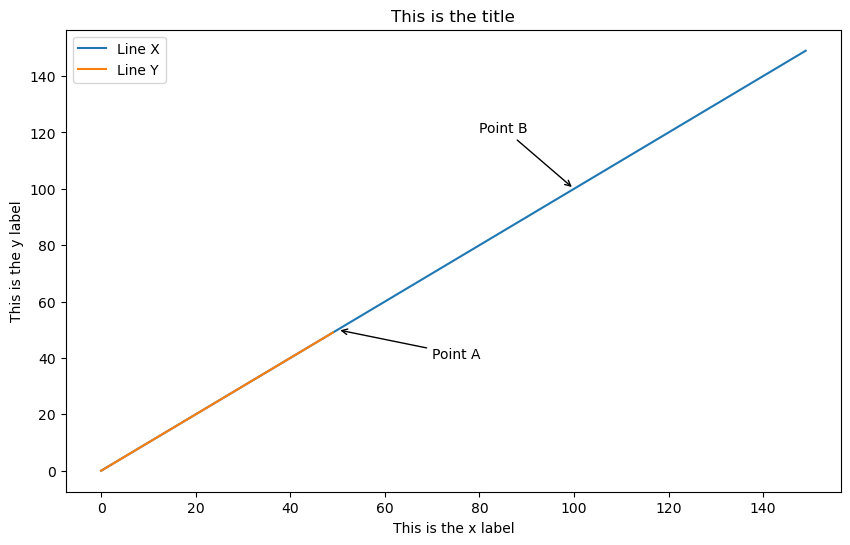

In [44]:
x = list(range(150))
y = list(range(50))

# Increase the figure size
plt.figure(figsize=(10, 6))

plt.xlabel('This is the x label')
plt.ylabel('This is the y label')
plt.title('This is the title')

# You need to specify labels for 
# the legend
plt.plot(x, label= 'Line X')
plt.plot(y, label= 'Line Y')

# Adding annotations to specific  
# points on the plot
plt.annotate('Point A', xy=(50, 50), xytext=(70, 40)
             , arrowprops=dict(facecolor='black'
             , arrowstyle='->'))
plt.annotate('Point B', xy=(100, 100), xytext=(80, 120)
             , arrowprops=dict(facecolor='black'
             , arrowstyle='->'))

# Display the legend
plt.legend()

plt.show()

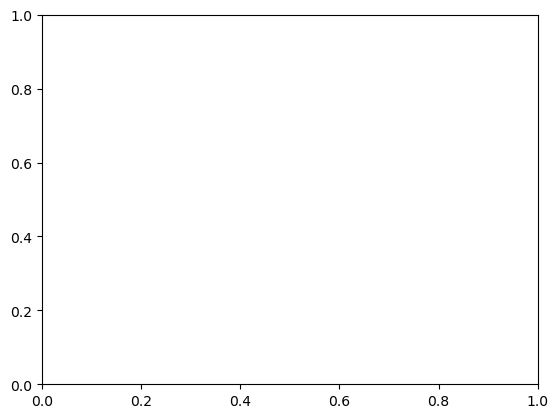

In [46]:
# using the variable ax for single a Axes
fig, ax = plt.subplots()

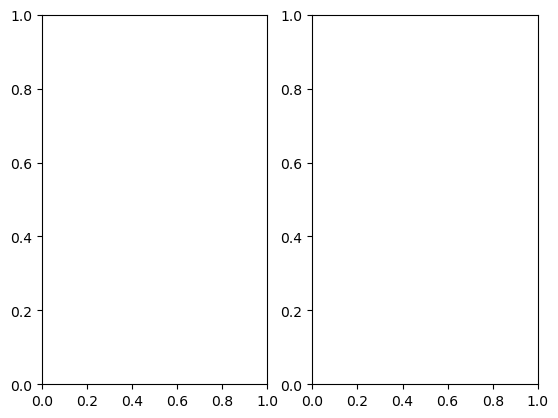

In [86]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(1, 2)

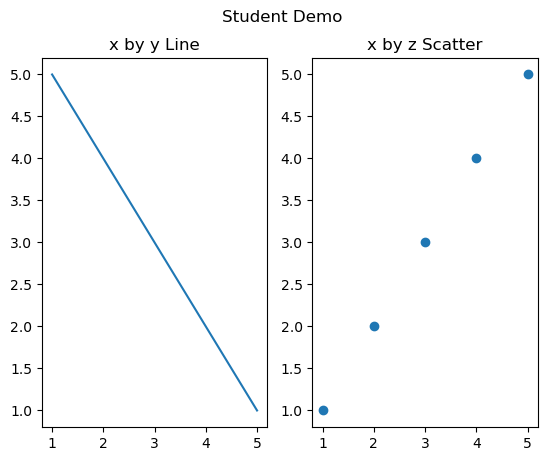

In [84]:
import matplotlib.pyplot as plt

# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

# sets up the figure container
# and the individual subplots/graphs
fig, (ax1, ax2) = plt.subplots(1, 2)

# 1st subplot
ax1.plot(x,y)
# and title
ax1.set_title('x by y Line')

# 2nd subplot
ax2.scatter(x,z)
# and title
ax2.set_title('x by z Scatter')

# Figure title
fig.suptitle('Student Demo')
plt.show()

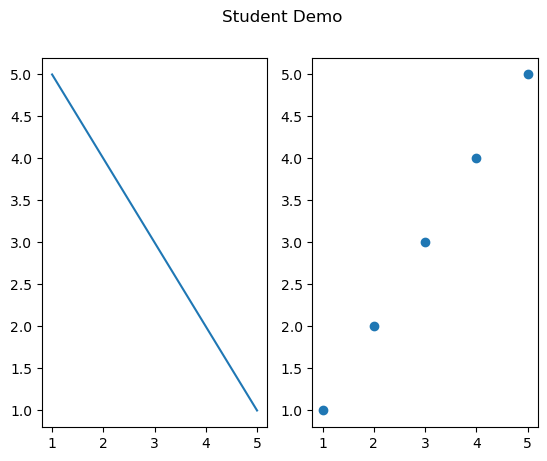

In [85]:
# using tuple unpacking for multiple Axes
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y)
ax1.set_title('x by y Line')

axs[1].scatter(x, z)
ax2.set_title('x by z Scatter')

fig.suptitle('Student Demo')
plt.show()

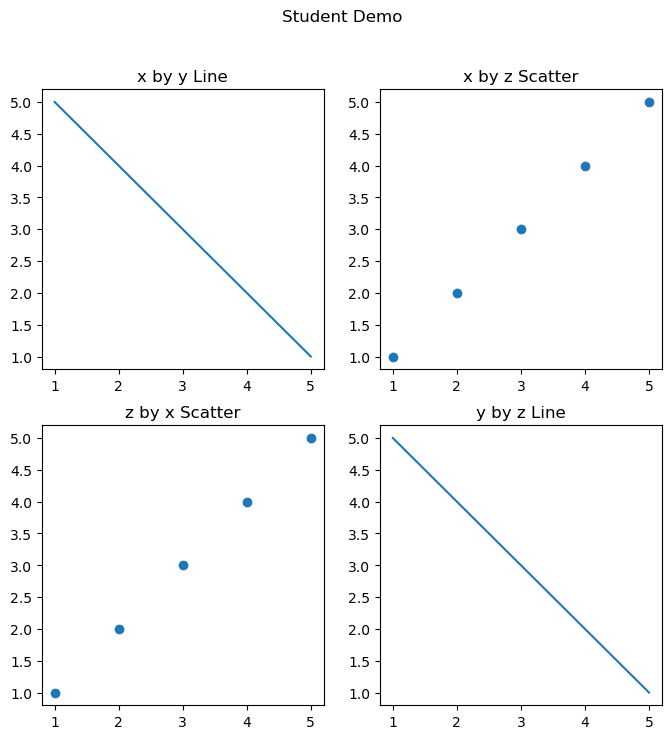

In [80]:
# using tuple unpacking for multiple Axes
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0,0].plot(x, y)
axs[0,0].set_title('x by y Line')

axs[0,1].scatter(x, z)
axs[0,1].set_title('x by z Scatter')

axs[1,0].scatter(z, x)
axs[1,0].set_title('z by x Scatter')

axs[1,1].plot(y, z)
axs[1,1].set_title('y by z Line')

fig.suptitle('Student Demo')
plt.show()

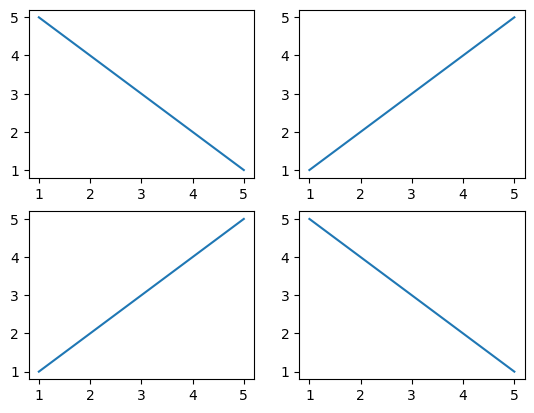

In [82]:
# using tuple unpacking for multiple Axes
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(x, y)
ax2.plot(x, z)
ax3.plot(z, x)
ax4.plot(y, z)
